Loading data from local file: iris_data.csv
Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.89      0.94         9
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



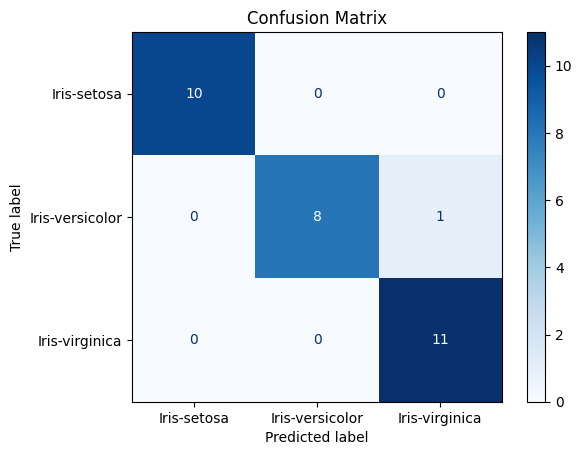

Model saved to svm_model.joblib


In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from joblib import dump

# Example of a public dataset URL (replace with your actual dataset URL)
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# Specify column names (for the iris dataset, for example)
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# 1. Check if the file exists locally, else download it
local_file_path = 'iris_data.csv'

if not os.path.exists(local_file_path):
    print(f"File not found locally. Downloading from {data_url}...")
    data = pd.read_csv(data_url, header=None, names=column_names)
    # Optionally, you can save it locally
    data.to_csv(local_file_path, index=False)
    print(f"Data downloaded and saved as {local_file_path}")
else:
    print(f"Loading data from local file: {local_file_path}")
    data = pd.read_csv(local_file_path)

# 2. Drop rows with missing values
data = data.dropna()

# 3. Select features and target variable
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]  # Features
y = data['class']  # Target variable

# 4. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Standardize the featurespip install --upgrade pandas numpy
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Initialize the SVM model
model = SVC(kernel='linear')

# 7. Hyperparameter tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf'
}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best model
best_model = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)

# 8. Make predictions on the test set
y_pred = best_model.predict(X_test_scaled)

# 9. Print classification report to evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 10. Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# 11. Save the model to a file
model_file_path = 'svm_model.joblib'
dump(best_model, model_file_path)
print(f"Model saved to {model_file_path}")